<a href="https://colab.research.google.com/github/myarnwas/CNN-Model-CIFAR-10-Dataset/blob/main/CNN_Model_CIFAR_10_Dataset_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📄 Project Overview – CIFAR-10 Image Classification using CNN

In this project, we will build a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset is a popular benchmark in computer vision and consists of 60,000 color images in 10 different classes, each image being 32×32 pixels.

The 10 classes in the dataset are:
	1.	Airplane
	2.	Car
	3.	Bird
	4.	Cat
	5.	Deer
	6.	Dog
	7.	Frog
	8.	Horse
	9.	Ship
	10.	Truck

We will use the Keras datasets module to directly load CIFAR-10 without any manual downloading. The dataset is already split into 50,000 training images and 10,000 testing images.

Steps in the Project:
	1.	Load and preprocess the data – Normalize pixel values to the range [0, 1] for faster and more stable training.
	2.	Build the CNN model – Create a multi-layer CNN with convolution, pooling, and dense layers to extract image features and classify them.
	3.	Compile the model – Use the Adam optimizer and sparse categorical cross-entropy loss function since we have multiple classes.
	4.	Train the model – Train for several epochs while monitoring accuracy on both training and validation data.
	5.	Evaluate the model – Check the accuracy on unseen test data.
	6.	Visualize the results – Plot training and validation accuracy to understand the model’s performance.

This project will demonstrate the power of CNNs in recognizing and classifying objects in images, even when they are small and low-resolution.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 44ms/step - accuracy: 0.3496 - loss: 1.7568 - val_accuracy: 0.5252 - val_loss: 1.3178
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.5694 - loss: 1.2097 - val_accuracy: 0.6040 - val_loss: 1.1079
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.6318 - loss: 1.0417 - val_accuracy: 0.6379 - val_loss: 1.0337
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6634 - loss: 0.9459 - val_accuracy: 0.6545 - val_loss: 0.9848
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6965 - loss: 0.8589 - val_accuracy: 0.6764 - val_loss: 0.9374
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7168 - loss: 0.7994 - val_accuracy: 0.6863 - val_loss: 0.9075
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7353 - loss: 0.7531 - val_accuracy: 0.7008 - val_loss: 0.8755
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7493 -

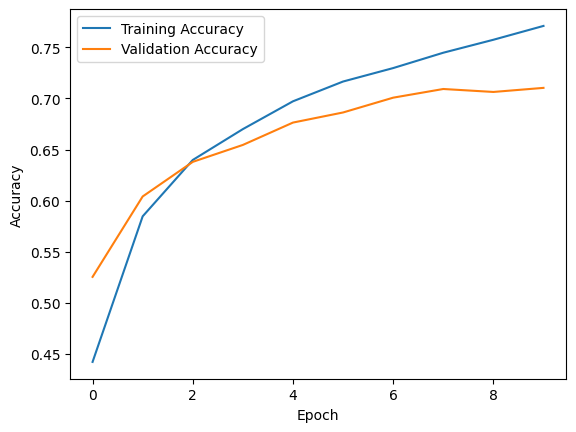

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Class names for reference
class_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# 2. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# 3. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 5. Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# 6. Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()